數據說明： 

Ames 房價預測是 Kaggle 平臺上的一個競賽任務，需要根據房屋
的特征來預測亞美尼亞州洛瓦市（Ames，Lowa）的房價。其中房屋的特征 x 共
有 79 維，響應值 y 為每個房屋的銷售價格（SalePrice）。評價標準為預測值的
對數和觀測值的對數的 RMSE(Root-Mean-Squared-Error )。
訓練數據（Ames_House_train.csv）和測試數據（Ames_House_test.csv）

作業要求：
1. 對數據做數據探索分析
2. 適當的數據清洗（異常值處理和缺失值處理）
3. 適當的特征工程
4. 用線性回歸模型對房價進行預測（最小二乘、嶺回歸、Lasso），註意正則超
參數的調優。

1、數據探索 

2、數據處理 

3、特征工程 

4、模型選擇 

5、模型融合

數據探索（EDA）

我們拿到數據後，先對數據要有個大致的了解，我們有1460的訓練數據和1459的測試數據，數據的特征列有79個，其中35個是數值類型的，44個類別類型。

# 1、導入必要的模塊

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy.stats import norm, skew
from scipy import stats
%matplotlib inline

In [2]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.max_columns',None)

In [3]:
#讀入數據
train = pd.read_csv('train.csv')

In [4]:
#查看
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
train_ID = train['Id']  

In [7]:
train.drop("Id", axis = 1, inplace = True) #不返回直接操作 #去掉唯一屬性，唯一標識符

In [8]:
train.shape

(1460, 80)

### 2、數據處理
#### 離群點處理：

當然數據探索部分並沒有結束，在數據處理部分，我們會邊探索邊處理：

在數據中會有個別離群點，他們對分類結果噪音太大，我們選擇將其刪掉。但是如果不是太過分的離群點，就不能刪掉，因為如果刪掉所有噪聲會影響模型的健壯性，對測試數據的泛化能力就會下降。

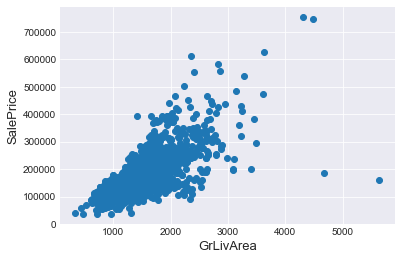

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

右下方的兩個數據，地上居住面積特別大，但是價格又低的離譜，應該是遠離市區的無人地帶。對最後的分類結果沒有影響的離群點（Oultliers），我們可以放心將其刪除。

In [10]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

刪除後：

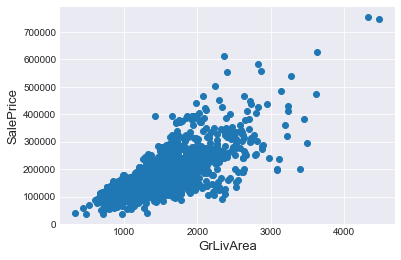

In [11]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

180932.91906721535 79467.78892987774


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


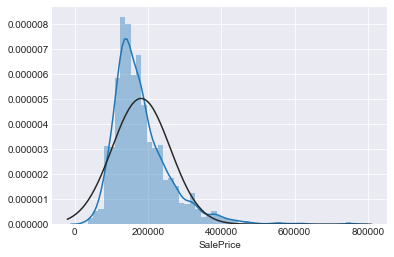

In [12]:
sns.distplot(train['SalePrice'] , fit=norm)
(mu, sigma) = norm.fit(train['SalePrice'])
print(mu, sigma)

線性的模型需要正態分布的目標值才能發揮最大的作用。我們需要檢測房價時候偏離正態分布。使用probplot函數，即<a href= "https://wenku.baidu.com/view/03c56baddd3383c4bb4cd2ae.html">正太概率圖</a>

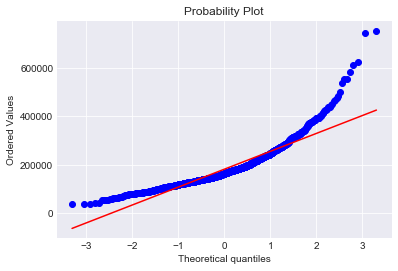

In [13]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

正態分布明顯屬於右態分布，整體峰值向左偏離，並且skewness較大，需要對目標值做log轉換，以恢複目標值的正態性。

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


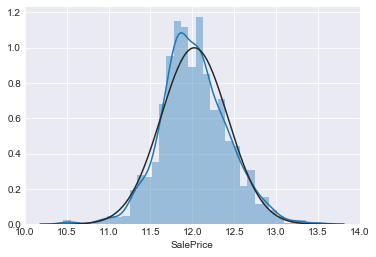

In [14]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'] , fit=norm)
(mu, sigma) = norm.fit(train['SalePrice'])

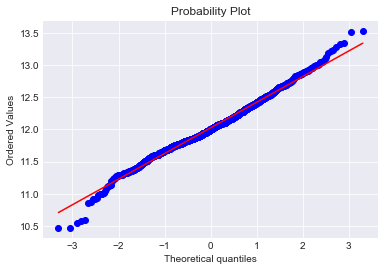

In [15]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [16]:
ntrain = train.shape[0]
y = train.SalePrice.values
all_data = train
all_data.drop(['SalePrice'], axis=1, inplace=True)
print(all_data.shape)

(1458, 79)


In [17]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100    #空值個數
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

In [18]:
missing_data.head()

,Missing Ratio
PoolQC,99.588
MiscFeature,96.296
Alley,93.759
Fence,80.727
FireplaceQu,47.325


缺失數據可視化：

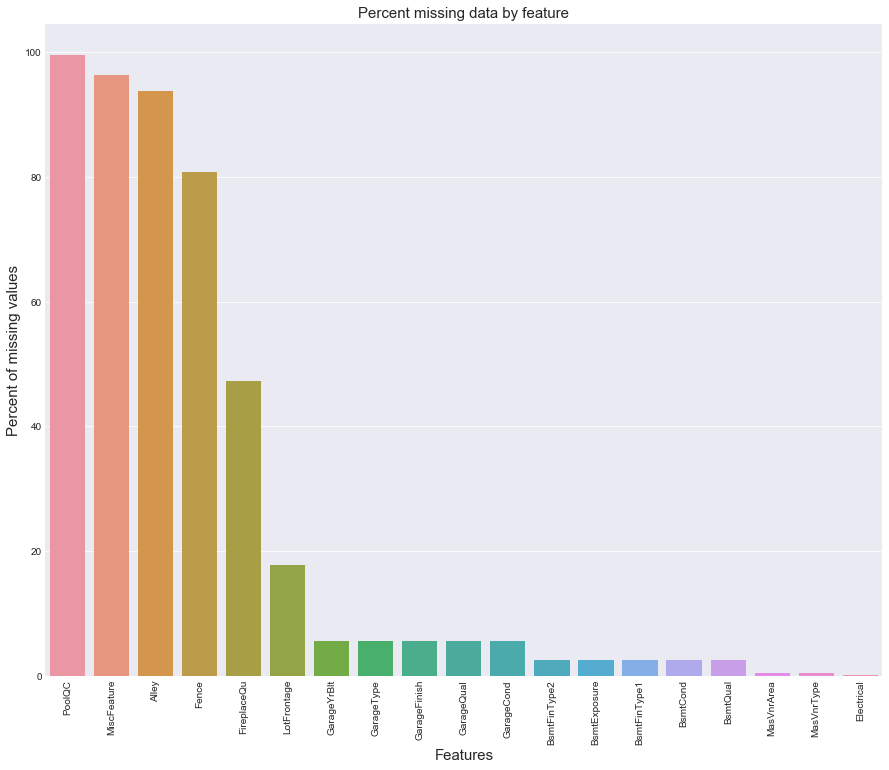

In [19]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

分析各個特征與房價的相關性，相關性的分析最好使用熱力圖：

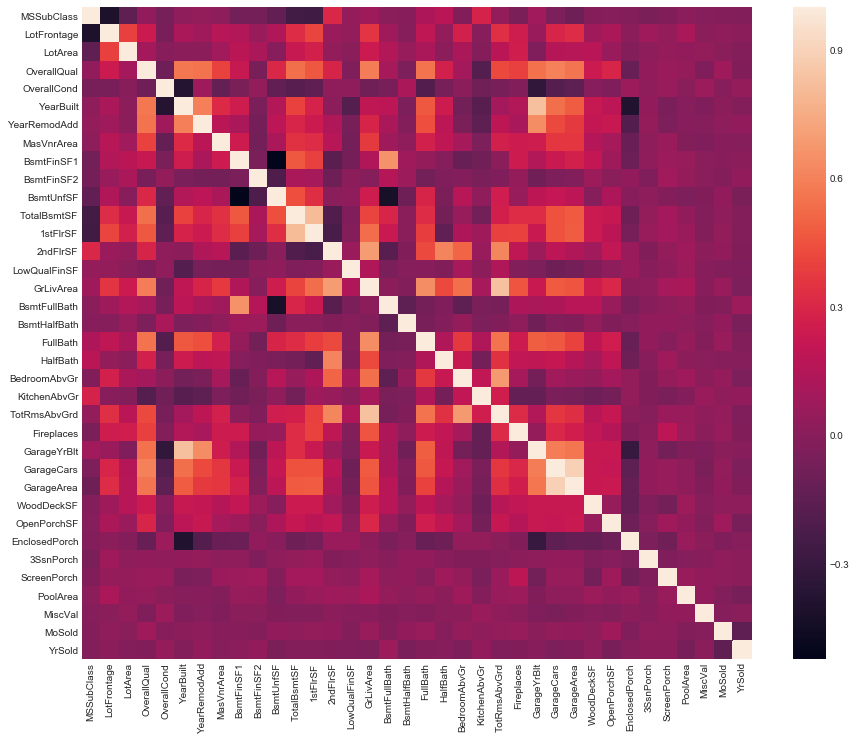

In [20]:
corrmat = train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat) 

可以看到對角線有一條白線，這代表相同的特征相關性為最高，但值得註意的是，有兩個正方形小塊：TotaLBsmtSF和1stFlrSF、GarageAreas和GarageCars處。這代表全部建築面積TotaLBsmtSF與一層建築面積1stFlrSF成強正相關，車庫區域GarageAreas和車庫車輛GarageCars成強正相關，那麽在填補缺失值的時候就有了依據，我們可以直接刪掉一個多余的特征或者使用一個填補另一個。

In [21]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")#空值變None
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())) #分組，每個LotFrontage中值填充
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

In [22]:
missing_data.head()

,Missing Ratio


有許多特征實際上是類別型的特征，但給出來的是數字。比如MSSubClass，是評價房子種類的一個特征，給出的是10-100的數字，但實際上是類別，所以我們需要將其轉化為字符串類別。

In [23]:
#房地產建築類別
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [24]:
#總體條件評級
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [25]:
#銷售年份、銷售月份
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

接下來 LabelEncoder，對文本類別的特征進行編號。

In [26]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')

In [27]:
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

In [28]:
all_data.shape

(1458, 78)

<font color=#00ffff size =5>重要：</font>接下來添加一個重要的特征，因為我們實際在購買房子的時候會考慮總面積的大小，但是此數據集中並沒有包含此數據。總面積等於地下室面積+1層面積+2層面積。

In [29]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

我們對房價進行分析，不符合正態分布我們將其log轉換，使其符合正態分布。那麽偏離正態分布太多的特征我們也對它進行轉化:

In [30]:
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

,Skew
MiscVal,24.435
PoolArea,15.933
LotArea,12.561
3SsnPorch,10.287
LowQualFinSF,8.996
LandSlope,4.805
KitchenAbvGr,4.480
BsmtFinSF2,4.248
ScreenPorch,4.115
BsmtHalfBath,4.096


In [31]:
%%html
<img src='偏度.png'>

In [32]:
skewness = skewness[abs(skewness) > 0.75]

In [33]:
from scipy.special import boxcox1p
from scipy.stats import boxcox
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)


# skewed_features = skewness.index
# rx=[]
# rl=[]
# for feat in skewed_features:
#     all_data[feat] = boxcox(all_data[feat]+0.00001,0.25)
#     #rx.append(x)
#     #rl.append(x)
print('ok')

ok


將類別特征進行啞變量轉化

In [34]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1458, 220)


註意：轉換並不總是有效，因此請確保在轉換後使用正態概率圖檢查數據。

In [35]:
# all_data.describe()
# all_data.to_csv('l1.csv')

In [36]:
# all_data.describe()
# all_data.to_csv('l2')

In [37]:
#將數據分割訓練數據與測試數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data, y, random_state=33, test_size=0.1)

In [38]:
from sklearn import  linear_model
from sklearn.metrics import r2_score,mean_squared_error
alphas = [i+0.0001 for i in range(0,5,200)]
#alphas = np.logspace(-10,10,n_alphas)
ridge = linear_model.RidgeCV(alphas=alphas, store_cv_values=True)
#模型訓練
ridge.fit(X_train, y_train)
#預測
y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)
print ('The r2 score of RidgeCV on train is', r2_score(y_train, y_train_pred_ridge))
print ('The r2 score of RidgeCV on test is', r2_score(y_test, y_test_pred_ridge))
print ('The mean_squared_error of RidgeCV on train is', mean_squared_error(y_train, y_train_pred_ridge))
print ('The mean_squared_error of RidgeCV on test is', mean_squared_error(y_test, y_test_pred_ridge))
print ('alpha is:', ridge.alpha_)

The r2 score of RidgeCV on train is 0.943755140463063
The r2 score of RidgeCV on test is 0.9099417547096964
The mean_squared_error of RidgeCV on train is 0.009169599153078174
The mean_squared_error of RidgeCV on test is 0.011642605378111962
alpha is: 0.0001


In [39]:
#alphas = [0.001, 0.01, 0.1, 1, 10,100]
alphas = [i/10000 for i in range(1,100)]
reg = linear_model.LassoCV(alphas= alphas)#導入模型傳入參數alpha=0.1
reg.fit(X_train, y_train)#訓練數據

y_test_pred_ridge = reg.predict(X_test)#模型預測
y_train_pred_ridge = ridge.predict(X_train)
print ('The r2 score of RidgeCV on train is', r2_score(y_train, y_train_pred_ridge))
print ('The r2 score of RidgeCV on test is', r2_score(y_test, y_test_pred_ridge))
print ('The mean_squared_error of LassoCV on train is', mean_squared_error(y_train, y_train_pred_ridge))
print ('The mean_squared_error of LassoCV on test is', mean_squared_error(y_test, y_test_pred_ridge))
print ('alpha is:', reg.alpha_)

The r2 score of RidgeCV on train is 0.943755140463063
The r2 score of RidgeCV on test is 0.9402771290343127
The mean_squared_error of LassoCV on train is 0.009169599153078174
The mean_squared_error of LassoCV on test is 0.007720890146815494
alpha is: 0.0005


In [40]:
from sklearn.linear_model import LinearRegression

# 使用默認配置初始化
lr = LinearRegression()

# 訓練模型參數
lr.fit(X_train, y_train)

# 預測

y_test_pred_ridge = lr.predict(X_test)
y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)
print ('The r2 score of LinearRegression on train is', r2_score(y_train, y_train_pred_ridge))
print ('The r2 score of LinearRegression on test is', r2_score(y_test, y_test_pred_ridge))
print ('The mean_squared_error of LinearRegression on train is', mean_squared_error(y_train, y_train_pred_ridge))
print ('The mean_squared_error of LinearRegression on test is', mean_squared_error(y_test, y_test_pred_ridge))

The r2 score of LinearRegression on train is 0.943755140463063
The r2 score of LinearRegression on test is 0.9099417547096964
The mean_squared_error of LinearRegression on train is 0.009169599153078174
The mean_squared_error of LinearRegression on test is 0.011642605378111962
